# Movie Recommendation System with Python

My foray into Recommendation Systems. <br> 
A simple system using numpy and pandas.

In [2]:
import pandas as pd
import numpy as np

### Data

There are two files in the dataset:<br>
<br>
    A dataset of movie ratings.<br>
    A dataset of all movies titles and their ids.

In [3]:
#Reading the ratings dataset.
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
m1 = pd.read_csv('C:/Users/Troy Lane/Documents/troy/port/original/u.data', sep='\t', names=column_names)

In [4]:
m1.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
m2 = pd.read_csv("C:/Users/Troy Lane/Documents/troy\port/original/Movie_Id_Titles.csv")

In [8]:
m2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We must merge the 2 dataframes to create one dataframe

The field that is identical in both sets is item_id. so we merge using this field.

In [12]:
movies = pd.merge(m1,m2,on='item_id')
movies.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import matplotlib as mpl
%matplotlib inline

How many ratings does eahc movie have?

In [14]:
movies.groupby('title')['rating'].count().head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

Movies with the most ratings in the dataset

In [15]:
most_rated = movies.groupby('title')['rating'].count().sort_values(ascending=False).head()
most_rated.head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Average rating per movie

In [16]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [17]:
ratings = pd.DataFrame(movies.groupby('title')['rating'].mean())
ratings = ratings.rename(columns={'rating': 'avg_rating'})
ratings.head()

,avg_rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings['num of ratings'] = pd.DataFrame(movies.groupby('title')['rating'].count())
ratings.head()

,avg_rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Visualizing the number of ratings:

Text(0, 0.5, '# of Movies')

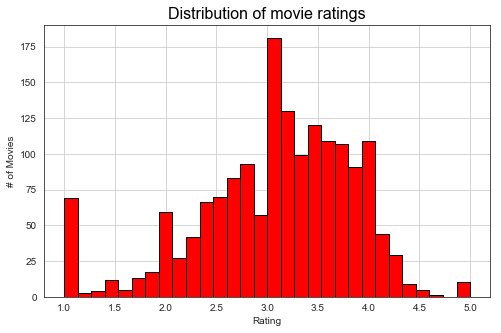

In [20]:
plt.figure(figsize=(8,5))
ratings['avg_rating'].hist(bins=30,color = "red", ec="black")
plt.title("Distribution of movie ratings", loc='center', fontsize=16, fontweight=1, color='black')
plt.xlabel("Rating")
plt.ylabel("# of Movies")

## Recommending similar movies 

To generate a movie reommender system we first need to create a matrix which shows all users' <br>rating for every movie in the dataset

In [21]:
movies_users = movies.pivot_table(index='user_id',columns='title',values='rating')

In [22]:
movies_users.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note the number of NaNs in the dataframe. This represents each movie that was not reviewed by each User. <br>There are a lot which makes complete sense as many people have not seen most of the movies.

Recall above we examined the movies with the most ratings.  Here it is again:

In [23]:
ratings.sort_values('num of ratings',ascending=False).head()

,avg_rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Let's choose two movies to focus on: starwars, a sci-fi movie. And Dumb and Dumber, a comedy.<br> So we'll grab the user ratings for those two movies:

In [24]:
starwars_user_ratings = movies_users['Star Wars (1977)']
liar_user_ratings = movies_users['Liar Liar (1997)']
starwars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [25]:
liar_user_ratings.head(10)

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
6    2.0
7    1.0
8    3.0
9    4.0
Name: Liar Liar (1997), dtype: float64

We use corrwith() method to get correlations between two pandas series:

In [26]:
similar_to_starwars = movies_users.corrwith(starwars_user_ratings)
similar_to_liarliar = movies_users.corrwith(liar_user_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean the data by removing NaN values and using a DataFrame instead of a series:

In [27]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [28]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [29]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [30]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for Liar Liar:

In [31]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [32]:
angry_user_ratings = movies_users['12 Angry Men (1957)']
angry_user_ratings.head(10)


user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
5    NaN
6    4.0
7    4.0
8    NaN
9    NaN
Name: 12 Angry Men (1957), dtype: float64

In [33]:
similar_to_angry = movies_users.corrwith(angry_user_ratings)

In [34]:
corr_12angryMen = pd.DataFrame(similar_to_angry,columns=['Correlation'])
corr_12angryMen.dropna(inplace=True)
corr_12angryMen = corr_12angryMen.join(ratings['num of ratings'])
corr_12angryMen[corr_12angryMen['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148




And we're done!

It looks like our results make sense. Even though the system is far from state of the art, it still recommended the other Star Warss movies (and another George Lucas film) for Star Wars; while it looks like there's some scope for more improvement in Liar Liar despite getting another Jim Carrey movie as a recommendation too.  For the 12 Angry Men, I think the system did a decent job of recommending other titles that are of similar genre.
